In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import make_moons

plt.style.use('dark_background')

In [ ]:
class DBScan_cust():
    def __init__(self, n_neighbors = 5, rad = 0.5):
        self.n_neighbors = n_neighbors
        self.rad = rad
        self.neighbors = None
        self.group = None
        self.labels = None

    def find_neighbors(self, x): # Calculate neighbors fo each observations and define core, border and noise points
        self.neighbors = np.zeros(x.shape[0])
        for i in range(len(x)): #  Define the 'box' space for each observation
            low = x[i] - self.rad
            high = x[i] + self.rad

            condition = np.all((x >= low) & (x <= high), axis = 1)
            self.neighbors[i] = np.sum(condition) - 1

        self.group = np.zeros(x.shape[0])

        self.group[self.neighbors >= self.n_neighbors] = 1
        self.group[(self.neighbors == 0)] = -1
        self.group[(self.neighbors < self.n_neighbors) & (self.neighbors > 0)] = 2

        print(self.group), print(self.neighbors)

        return self.group.astype(int)


    def link_cluster(self, x, n): # Recursion function that pass through all connected core/border points and attribute them to the cluster
        condition_1 = self.labels == 0 # No cluster condition
        condition_3 = self.group != 2 # Border condition
        if len(x.shape) > 1 : # If there is more than one point
            for i in range(len(x)):
                low = x[i] - self.rad
                high = x[i] + self.rad

                condition_2 = np.all((self.x >= low) & (self.x <= high),axis = 1) # 'box' condition
                x_temp = self.x[(condition_2) & (condition_1) & (condition_3)] # Temp variable to save the coordinates for the next recursion step before assign the cluster
                self.labels[(condition_2) & (condition_1)] = n
                self.link_cluster(x_temp, n)


        else: # If there is only one point
                low = x - self.rad
                high = x + self.rad

                condition_2 = np.all((self.x >= low) & (self.x <= high),axis = 1)
                x_temp = self.x[(condition_2) & (condition_1) & (condition_3)]
                self.labels[(condition_2) & (condition_1)] = n
                self.link_cluster(x_temp, n)




    def fit(self, x):
        self.x = x
        self.labels = np.zeros(x.shape[0])
        groups = self.find_neighbors(x)

        n = 1
        self.labels[groups == -1] = -1
        while np.any(self.labels == 0):
            for i in range(len(x)):
                if self.labels[i] == 0:
                    self.labels[i] = n
                    self.link_cluster(x[i], n)
                    n += 1

        print(self.labels)
        return self.labels , self.group, self.neighbors


In [ ]:
x, _ = make_moons(n_samples = 500, noise = 0.05, random_state = 42)

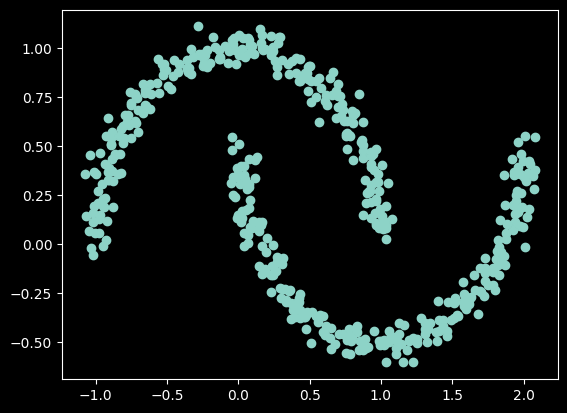

In [ ]:
plt.plot(x[:, 0], x[:, 1], 'o')

In [ ]:
scaler = StandardScaler()
x_scaled = scaler.fit_transform(x)

In [ ]:
model = DBScan_cust(n_neighbors = 6, rad = 0.1)
a, b, c = model.fit(x)

[ 1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.
  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.
  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.
  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.
  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.
  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  2.  1.  1.
  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.
  1.  1.  1.  1.  1.  1.  1.  1. -1.  1.  1.  1.  1.  1.  1.  1.  1.  1.
  2.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  2.  2.  1.  1.  1.
  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  2.  1.  1.  1.  1.  1.  1.  1.
  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  2.  1.  1.
  1.  1.  1.  1.  2.  2.  1.  1.  1.  2.  1.  1.  2.  1.  1.  1.  2.  1.
  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.
  1.  1.  1.  1.  1.  1.  2.  1.  1.  1.  1.  1.  1

In [ ]:
a = np.array(a)
unique, counts = np.unique(a, return_counts=True)
print(dict(zip(unique, counts)))

{-1.0: 1, 1.0: 248, 2.0: 249, 3.0: 1, 4.0: 1}


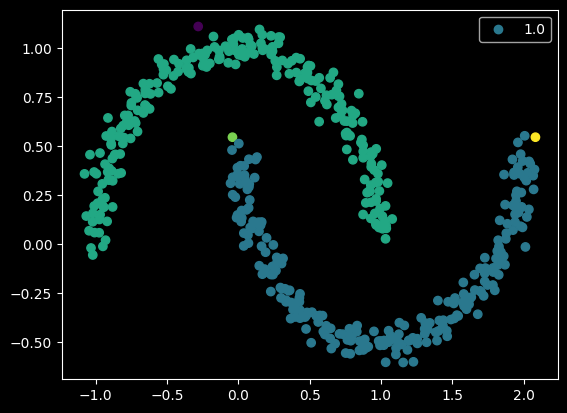

In [ ]:
plt.scatter(x[:, 0], x[:, 1], c = model.labels)
plt.legend(model.labels)

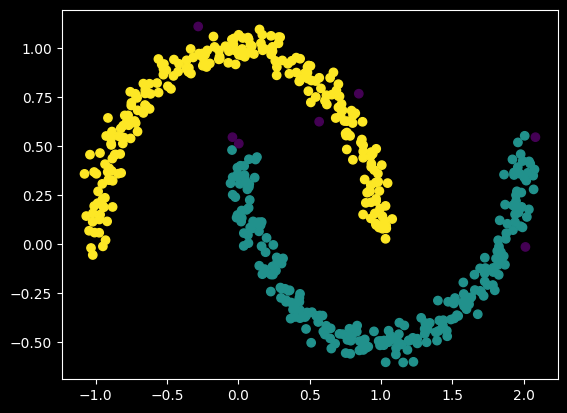

In [ ]:
model_box = DBSCAN(eps = 0.1, min_samples = 6)
model_box.fit(x)

plt.scatter(x[:, 0], x[:, 1], c = model_box.labels_)

In [ ]:
 model_box.labels_

array([ 0,  1,  0,  1,  1,  0,  0,  1,  1,  0,  1,  1,  0,  1,  0,  0,  0,
        1,  0,  0,  0,  0,  0,  0,  1,  0,  0,  1,  1,  0,  0,  0,  0,  1,
        1,  0,  0,  1,  1,  1,  0,  1,  0,  1,  1,  1,  1,  1,  0,  1,  1,
        1,  1,  0,  1,  1,  1,  1,  1,  1,  0,  0,  0,  0,  1,  1,  0,  1,
        1,  0,  0,  0,  0,  0,  0,  0,  0,  1,  0,  0,  1,  1,  0,  1,  0,
        1,  1,  0,  0,  0,  0,  0,  0,  0,  0,  0,  1,  1,  0,  1,  1,  0,
        1,  0,  0, -1,  0,  1,  0,  1,  1,  0,  0,  1,  0,  0,  1,  1,  1,
        1,  1,  1,  0,  1,  1,  1,  0,  1,  1,  0,  1,  1,  0,  0, -1,  1,
        1,  1,  1,  0,  1,  1,  0,  1,  0,  0,  1,  1,  0,  0,  1,  1,  1,
        1,  0,  0,  1,  1,  0,  1,  1,  0,  0,  1,  0,  0,  1,  1,  0,  1,
        1,  1,  0,  1,  1,  1,  0,  1,  1,  0,  0,  1,  0,  0,  0,  1,  0,
        1,  1,  1,  0,  0,  0,  0,  1,  1,  1,  1,  1,  0,  0,  1,  1,  1,
        1,  1,  1, -1,  0,  0, -1,  1,  0,  0,  0,  0,  0,  1,  0,  1,  0,
        0,  1,  1,  1,  0